In [2]:
!pip install kaggle


In [3]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"llhvglbmlf","key":"3636d258b5332af361f9e3c3825f7c4b"}'}

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [5]:
!kaggle datasets download -d vipoooool/new-plant-diseases-dataset


Dataset URL: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset
License(s): copyright-authors
100% 2.70G/2.70G [01:16<00:00, 42.7MB/s]
100% 2.70G/2.70G [01:16<00:00, 37.7MB/s]


In [6]:
!unzip new-plant-diseases-dataset.zip


Streaming output truncated to the last 5000 lines.
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/273a7a9e-18be-4b6a-976a-fa5ffd69b731___RS_HL 4366_90deg.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/275f8963-f4f4-4903-962b-1da716725d08___RS_HL 4780_90deg.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/275f8963-f4f4-4903-962b-1da716725d08___RS_HL 4780_new30degFlipLR.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/27c2aaa4-de4b-4fb1-ba8d-14d4b24b2afa___RS_HL 4665.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/27c2aaa4-de4b-4fb1-ba8d-14d4b24b2afa___RS_HL 4665_270deg.JPG  
  inflating: new plant diseases dataset(augmented)/New 

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import keras
from keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array
from keras.applications.vgg19 import VGG19,preprocess_input,decode_predictions

In [8]:
len(os.listdir('/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train'))

38

In [9]:
train_datagen=ImageDataGenerator(zoom_range=0.5,shear_range=0.3,horizontal_flip=True,preprocessing_function=preprocess_input)
val_datagen=ImageDataGenerator(preprocessing_function=preprocess_input)

In [10]:
train=train_datagen.flow_from_directory(directory='/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train',
                                        target_size=(256,256),batch_size=32)
val=val_datagen.flow_from_directory(directory='/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid',
                                        target_size=(256,256),batch_size=32)


Found 70295 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.


In [11]:
t_img,label=train.next()

In [12]:
t_img.shape

(32, 256, 256, 3)

In [13]:
def plotImage(img_arr,label):
  for im,l in zip(img_arr,label):
    plt.figure(figsize=(5,5))
    plt.imshow(im)
    plt.show()

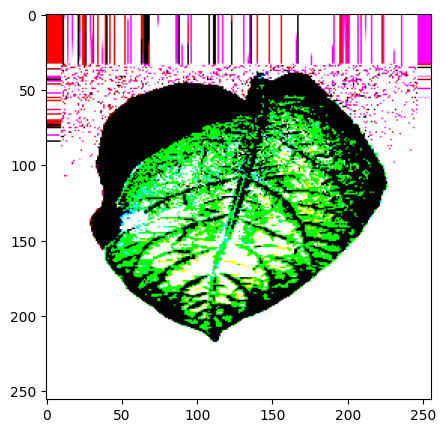

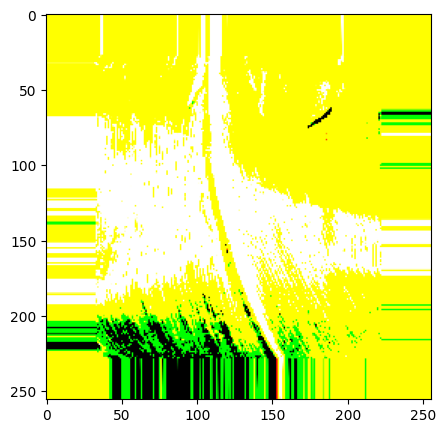

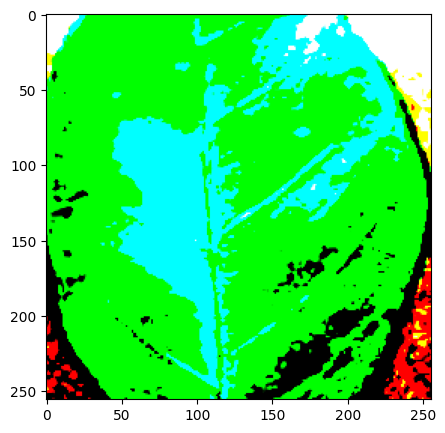

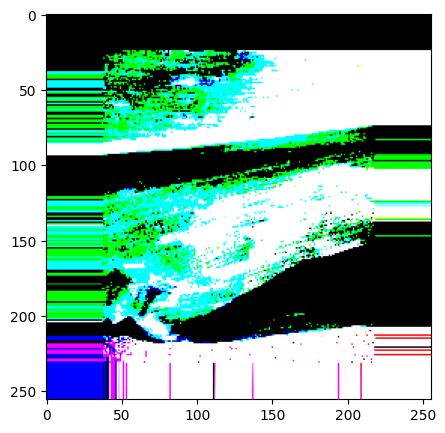

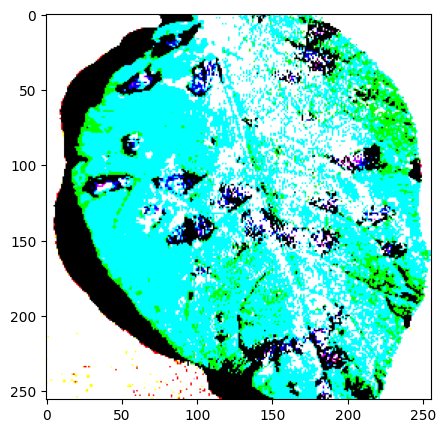

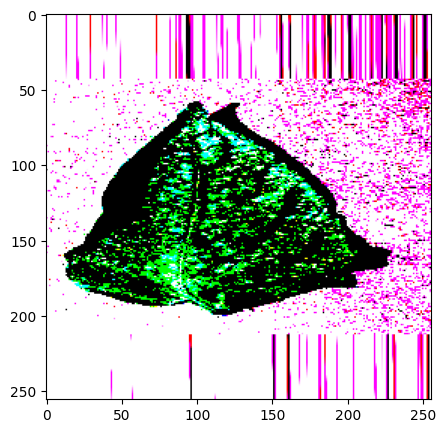

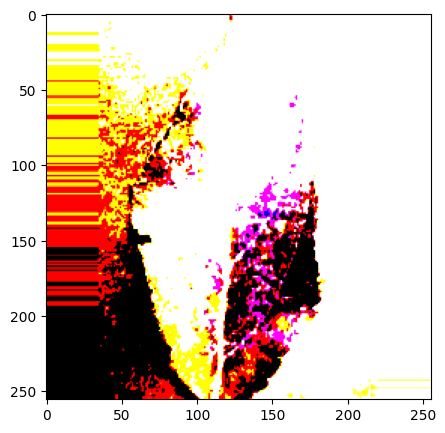

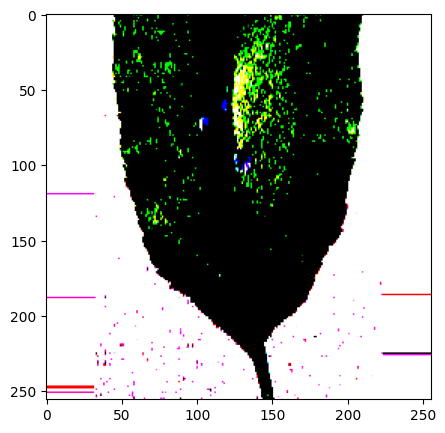

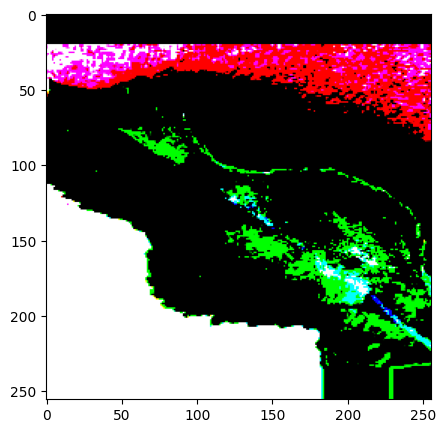

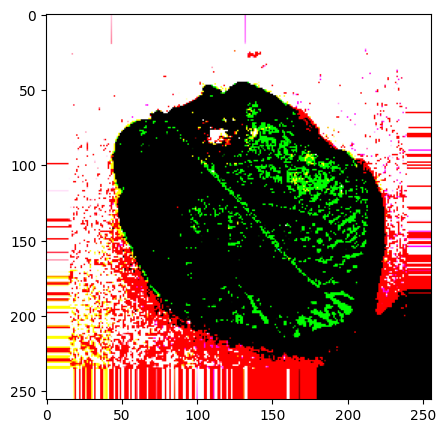

In [14]:
plotImage(t_img[:10],label[:10])

In [15]:
from keras.layers import Dense,Flatten
from keras.models import Model
from keras.applications.vgg19 import VGG19,preprocess_input,decode_predictions
import keras

In [16]:
base_model=VGG19(input_shape=(256,256,3),include_top=False)

80134624/80134624 [==============================] - 2s 0us/step


In [17]:
for layer in base_model.layers:
  layer.trainable=False

In [18]:
base_model.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [19]:
X=Flatten()(base_model.output)
X=Dense(units=38,activation='softmax')(X)
model=Model(base_model.input,X)

In [20]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [21]:
model.compile(optimizer='adam',loss=keras.losses.categorical_crossentropy,metrics=['accuracy'])

In [22]:
from keras.callbacks import ModelCheckpoint,EarlyStopping
es=EarlyStopping(monitor='val_accuracy',min_delta=0.01,patience=3,verbose=1)
mc=ModelCheckpoint(filepath="best_model.h5",monitor='val_accuracy',min_delta=0.01,patience=3,verbose=1,save_best_only=True)
cb=[es,mc]

In [23]:
his=model.fit_generator(train,steps_per_epoch=16,epochs=50,verbose=1,callbacks=cb,validation_data=val,validation_steps=16)

<ipython-input-23-0259a9eb2680>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  his=model.fit_generator(train,steps_per_epoch=16,epochs=50,verbose=1,callbacks=cb,validation_data=val,validation_steps=16)


Epoch 1/50
16/16 [==============================] - ETA: 0s - loss: 23.8779 - accuracy: 0.2051
Epoch 1: val_accuracy improved from -inf to 0.44531, saving model to best_model.h5
16/16 [==============================] - 23s 787ms/step - loss: 23.8779 - accuracy: 0.2051 - val_loss: 14.1204 - val_accuracy: 0.4453


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 2/50
16/16 [==============================] - ETA: 0s - loss: 12.0212 - accuracy: 0.4746
Epoch 2: val_accuracy improved from 0.44531 to 0.58398, saving model to best_model.h5
16/16 [==============================] - 13s 851ms/step - loss: 12.0212 - accuracy: 0.4746 - val_loss: 9.2770 - val_accuracy: 0.5840
Epoch 3/50
16/16 [==============================] - ETA: 0s - loss: 12.6704 - accuracy: 0.5215
Epoch 3: val_accuracy improved from 0.58398 to 0.58789, saving model to best_model.h5
16/16 [==============================] - 13s 799ms/step - loss: 12.6704 - accuracy: 0.5215 - val_loss: 11.3734 - val_accuracy: 0.5879
Epoch 4/50
16/16 [==============================] - ETA: 0s - loss: 9.9561 - accuracy: 0.5820
Epoch 4: val_accuracy improved from 0.58789 to 0.64453, saving model to best_model.h5
16/16 [==============================] - 12s 758ms/step - loss: 9.9561 - accuracy: 0.5820 - val_loss: 8.4034 - val_accuracy: 0.6445
Epoch 5/50
16/16 [==============================] - ETA: 0s

In [24]:
h=his.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

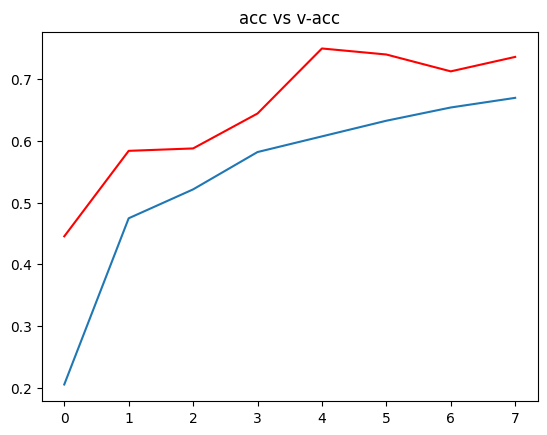

In [25]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'],c="red")
plt.title("acc vs v-acc")
plt.show()

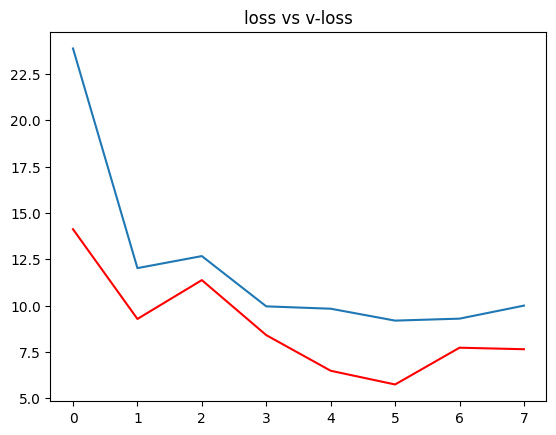

In [26]:
plt.plot(h['loss'])
plt.plot(h['val_loss'],c="red")
plt.title("loss vs v-loss")
plt.show()

In [27]:
from keras.models import load_model
model=load_model('/content/best_model.h5')

In [28]:
acc=model.evaluate_generator(val)[1]
print(acc*100)

<ipython-input-28-863648817e43>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  acc=model.evaluate_generator(val)[1]


71.77896499633789


In [45]:
ref=dict(zip(list(train.class_indices.values()),list(train.class_indices.keys())))

In [46]:
ref

{0: 'Apple___Apple_scab',
 1: 'Apple___Black_rot',
 2: 'Apple___Cedar_apple_rust',
 3: 'Apple___healthy',
 4: 'Blueberry___healthy',
 5: 'Cherry_(including_sour)___Powdery_mildew',
 6: 'Cherry_(including_sour)___healthy',
 7: 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 8: 'Corn_(maize)___Common_rust_',
 9: 'Corn_(maize)___Northern_Leaf_Blight',
 10: 'Corn_(maize)___healthy',
 11: 'Grape___Black_rot',
 12: 'Grape___Esca_(Black_Measles)',
 13: 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 14: 'Grape___healthy',
 15: 'Orange___Haunglongbing_(Citrus_greening)',
 16: 'Peach___Bacterial_spot',
 17: 'Peach___healthy',
 18: 'Pepper,_bell___Bacterial_spot',
 19: 'Pepper,_bell___healthy',
 20: 'Potato___Early_blight',
 21: 'Potato___Late_blight',
 22: 'Potato___healthy',
 23: 'Raspberry___healthy',
 24: 'Soybean___healthy',
 25: 'Squash___Powdery_mildew',
 26: 'Strawberry___Leaf_scorch',
 27: 'Strawberry___healthy',
 28: 'Tomato___Bacterial_spot',
 29: 'Tomato___Early_blight',
 30: '

In [66]:
def prediction(path, model, ref):
    # Load and plot the image
    img = load_img(path, target_size=(256, 256))
    plt.imshow(img)
    plt.title("Original Image")
    plt.axis('off')
    plt.show()

    # Convert the image to an array and preprocess it
    i = img_to_array(img)
    im = preprocess_input(i)
    img = np.expand_dims(im, axis=0)

    # Predict the class of the image
    pred = np.argmax(model.predict(img))
    print(f"The image belongs to {ref[pred]}")

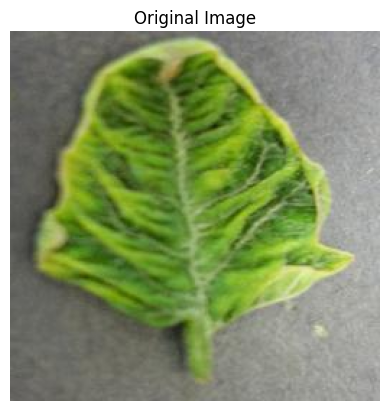

1/1 [==============================] - 0s 19ms/step
The image belongs to Tomato___Tomato_Yellow_Leaf_Curl_Virus


In [67]:
path="/content/test/test/TomatoYellowCurlVirus6.JPG"
prediction(path,model,ref)

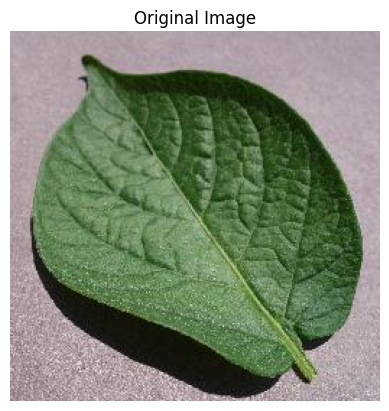

1/1 [==============================] - 0s 29ms/step
The image belongs to Potato___healthy


In [68]:
path="/content/test/test/PotatoHealthy1.JPG"
prediction(path,model,ref)